In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# Initializing a dataframe which will store all the information
cities_weather_df = pd.DataFrame(cities)
cities_weather_df = cities_weather_df.rename({0:"City"},axis='columns')
cities_weather_df["Country"] = ""
cities_weather_df["Date"] = ""
cities_weather_df["Latitude"] = ""
cities_weather_df["Longitude"] = ""
cities_weather_df["Temperature"] = ""
cities_weather_df["Humidity"] = ""
cities_weather_df["Cloudiness"] = ""
cities_weather_df["Wind Speed"] = ""
cities_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,bambous virieux,,,,,,,,
1,bilma,,,,,,,,
2,hermanus,,,,,,,,
3,carnarvon,,,,,,,,
4,mataura,,,,,,,,


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

params = {
    "APPID": api_key,
    "units": "Imperial",
    "q": ""
}
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather"


In [5]:
# Loop through the cities Dataframe and run a weather search for each city
for index, row in cities_weather_df.iterrows():

    # update query value
    params["q"] = row["City"]

    # make request
    city_weather_url = requests.get(base_url, params)
    city_weather = city_weather_url.json()
    
    # print the number of record and city being processed 
    print(f"\nProcessing record {index + 1} for city {row[0]}")
    
    # assign values in the dataframe
    # using try-except so that cities for which no data is returned from API can be assigned NaN value and processed correctly
    try:
        cities_weather_df.loc[index,"Country"] = city_weather["sys"]["country"]
        cities_weather_df.loc[index,"Date"] = city_weather["dt"]
        cities_weather_df.loc[index,"Latitude"] = city_weather["coord"]["lat"]
        cities_weather_df.loc[index,"Longitude"] = city_weather["coord"]["lon"]
        cities_weather_df.loc[index,"Temperature"] = city_weather["main"]["temp_max"]
        cities_weather_df.loc[index,"Humidity"] = city_weather["main"]["humidity"]
        cities_weather_df.loc[index,"Cloudiness"] = city_weather["clouds"]["all"]
        cities_weather_df.loc[index,"Wind Speed"] = city_weather["wind"]["speed"]
    except:
        cities_weather_df.loc[index,"Country"] = np.nan
        cities_weather_df.loc[index,"Date"] = np.nan
        cities_weather_df.loc[index,"Latitude"] = np.nan
        cities_weather_df.loc[index,"Longitude"] = np.nan
        cities_weather_df.loc[index,"Temperature"] = np.nan
        cities_weather_df.loc[index,"Humidity"] = np.nan
        cities_weather_df.loc[index,"Cloudiness"] = np.nan
        cities_weather_df.loc[index,"Wind Speed"] = np.nan
        print("City not found... skipping.")    


Processing record 1 for city bambous virieux

Processing record 2 for city bilma

Processing record 3 for city hermanus

Processing record 4 for city carnarvon

Processing record 5 for city mataura

Processing record 6 for city nikolskoye

Processing record 7 for city vaini

Processing record 8 for city nanaimo

Processing record 9 for city santa rosa

Processing record 10 for city butaritari

Processing record 11 for city ushuaia

Processing record 12 for city rikitea

Processing record 13 for city hobart

Processing record 14 for city nantucket

Processing record 15 for city seymchan

Processing record 16 for city ziro

Processing record 17 for city ostrovnoy

Processing record 18 for city qaanaaq

Processing record 19 for city hilo

Processing record 20 for city avarua

Processing record 21 for city margate

Processing record 22 for city arlit

Processing record 23 for city areia branca

Processing record 24 for city skalistyy
City not found... skipping.

Processing record 25 for c


Processing record 189 for city bengkulu
City not found... skipping.

Processing record 190 for city bolungarvik
City not found... skipping.

Processing record 191 for city wilmington

Processing record 192 for city banda aceh

Processing record 193 for city chapais

Processing record 194 for city sherpur

Processing record 195 for city solton

Processing record 196 for city luderitz

Processing record 197 for city victoria

Processing record 198 for city hobyo

Processing record 199 for city hualmay

Processing record 200 for city palabuhanratu
City not found... skipping.

Processing record 201 for city vardo

Processing record 202 for city sambava

Processing record 203 for city rawson

Processing record 204 for city jamestown

Processing record 205 for city hasaki

Processing record 206 for city ballina

Processing record 207 for city bathsheba

Processing record 208 for city santiago de cuba

Processing record 209 for city sarangani

Processing record 210 for city constitucion

Pro


Processing record 374 for city mahibadhoo

Processing record 375 for city vaitupu
City not found... skipping.

Processing record 376 for city romilly-sur-seine

Processing record 377 for city ulaanbaatar

Processing record 378 for city san luis

Processing record 379 for city louisbourg
City not found... skipping.

Processing record 380 for city beringovskiy

Processing record 381 for city nyuksenitsa

Processing record 382 for city luwuk

Processing record 383 for city ijaki
City not found... skipping.

Processing record 384 for city brasilia de minas

Processing record 385 for city xuddur

Processing record 386 for city honiara

Processing record 387 for city san francisco

Processing record 388 for city gotsu

Processing record 389 for city soyo

Processing record 390 for city bone

Processing record 391 for city srostki

Processing record 392 for city bedford

Processing record 393 for city calvinia

Processing record 394 for city bandarbeyla

Processing record 395 for city namibe


Processing record 562 for city puerto del rosario

Processing record 563 for city kruszwica

Processing record 564 for city iracoubo

Processing record 565 for city luyang

Processing record 566 for city waddan

Processing record 567 for city seoul

Processing record 568 for city bozova

Processing record 569 for city christchurch

Processing record 570 for city umm durman
City not found... skipping.

Processing record 571 for city damara

Processing record 572 for city acarau
City not found... skipping.

Processing record 573 for city mansa

Processing record 574 for city broken hill

Processing record 575 for city buta

Processing record 576 for city mayo

Processing record 577 for city lamu

Processing record 578 for city santa marta

Processing record 579 for city villa carlos paz

Processing record 580 for city orocue

Processing record 581 for city kovur

Processing record 582 for city santa eulalia del rio
City not found... skipping.

Processing record 583 for city nogliki

Pro

In [6]:
# Cleanup data to remove cities for which response was not returned from Weather API
cities_weather_df = cities_weather_df.dropna()
cities_weather_df = cities_weather_df.reset_index()

In [7]:
# Visualize to confirm DataFrame is created correctly
cities_weather_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,0,bambous virieux,MU,1535695200,-20.34,57.76,77,65,40,14.99
1,1,bilma,NE,1535699701,18.69,12.92,78.72,44,0,3.74
2,2,hermanus,ZA,1535699390,-34.42,19.24,46.05,91,64,2.39
3,3,carnarvon,ZA,1535699430,-30.97,22.13,42.9,52,0,3.96
4,4,mataura,NZ,1535699390,-46.19,168.86,46.05,79,36,8.1


In [8]:
# Convert the seconds to date using time library functions

date = time.strftime("%m/%d/%Y", time.gmtime(cities_weather_df['Date'][0])

date

'08/31/2018'

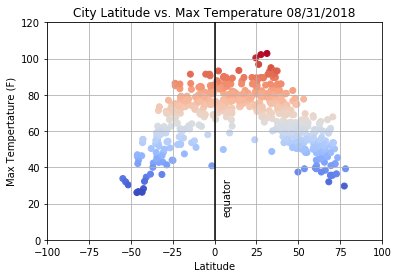

In [9]:

# Build the scatter plots for Latitude vs Temperature
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Temperature"],
            c=cities_weather_df["Temperature"], cmap=plt.cm.coolwarm)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+date)
plt.xlabel("Latitude")
plt.ylabel("Max Tempertature (F)")
plt.xlim(-100,100)
plt.ylim(0,120)
plt.vlines(0,-100,150)
plt.text(5,30,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("Images/LatitudevsMaxTemperature.png")


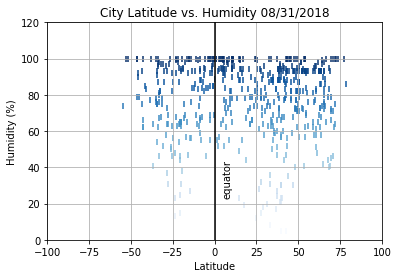

In [10]:
# Build the scatter plots for Latitude vs Humidity
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Humidity"],marker = "|",
            c=cities_weather_df["Humidity"], cmap=plt.cm.Blues)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,120)
plt.xlim(-100,100)
plt.vlines(0,-10,150)
plt.text(5,40,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("Images/LatitudevsHumidity.png")


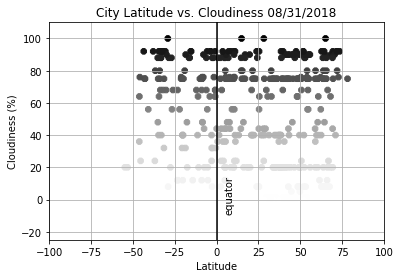

In [11]:
# Build the scatter plot for Latitude vs Cloudiness
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Cloudiness"],marker="8",
            c=cities_weather_df["Cloudiness"], cmap=plt.cm.Greys)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-100,100)
plt.ylim(-25,110)
plt.vlines(0,-25,120)
plt.text(5,10,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("Images/LatitudevsCloudiness.png")


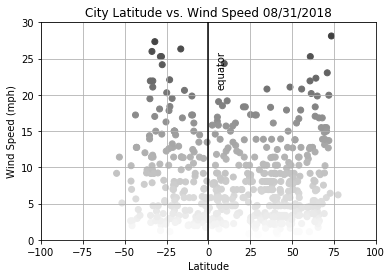

In [12]:
# Build the scatter plot for Latitude vs Wind Speed
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Wind Speed"],
            c=cities_weather_df["Wind Speed"], cmap=plt.cm.binary)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-100,100)
plt.ylim(0,30)
plt.vlines(0,0,30)
plt.text(5,25,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("Images/LatitudevsWindSpeed.png")


In [14]:
# Saving dataframe in a csv

cities_weather_df.to_csv('city_weather_by_latitude.csv')